About this Dataset:

This Airbnb dataset consists of information collected from 2011-2023 about House and Apartment
owners in New York City who rent their properties to guests to stay for short period of time.
id : ID of hosted houses or apartments.
name : Names of the Hosted house or apartments.
host_id: ID of the Host.
host_name : Name of the Host.
neighbourhood_group: Boroughs of NYC.
neighbourhood: Neighourhoods in the Boroughs
 of NYC.
latitude: Latitude.
longitude: Longitude.
room_type: Type of hosted Houses.
price: Price of the hosted Houses.
minimum_nights: Minimum number of nights spent at the Hosted Homes.
number_of_reviews : Total number of reviews.
last_review: Last date of the review posted.
reviews_per_month: number of reviews per month
calculated_host_listings_count: Number of accommodations hosted by the Host.
availability_365: number of days.
number_of_reviews_ltm: Number of reviews in the last n months.
license: Accommodation License.
'Special': Only one person has a license.

In [23]:
!pip install missingno


In [95]:
# For data cleaning
import pandas as pd
import numpy as np

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For visualizing NaN values
import missingno as msno


# For wordcloud generation
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import plotly.express as px

In [4]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2.595000e+03,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,150,30,49,6/21/2022,0.30,3,314,3,NaN
1,5.121000e+03,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.685350,-73.955120,Private room,60,30,50,12/2/2019,0.30,2,365,1,NaN
2,5.203000e+03,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.803800,-73.967510,Private room,75,2,118,7/21/2017,0.72,1,0,0,NaN
3,5.178000e+03,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.764570,-73.983170,Private room,68,2,575,2/19/2023,3.41,1,106,52,NaN
4,5.136000e+03,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.662650,-73.994540,Entire home/apt,275,60,3,8/10/2022,0.03,1,181,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42926,8.397530e+17,bright studio in Williamsburg,28057253,Jean,Brooklyn,Williamsburg,40.718976,-73.963985,Entire home/apt,76,7,0,NaN,NaN,1,8,0,NaN
42927,8.397870e+17,Room in the heart of LES with Gym& Rooftop BBQ,247439246,Charlene,Manhattan,East Village,40.721703,-73.981473,Private room,32,30,0,NaN,NaN,5,79,0,NaN
42928,8.397980e+17,Fantastic 3BD apt in Brooklyn,26349246,Jose,Brooklyn,Bushwick,40.688700,-73.907650,Entire home/apt,127,3,0,NaN,NaN,8,356,0,NaN
42929,8.398140e+17,The Coziest Home,48533809,Remmy,Staten Island,Bull's Head,40.616911,-74.164652,Entire home/apt,280,1,0,NaN,NaN,1,87,0,NaN


In [8]:
data.shape

(42931, 18)

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42931 entries, 0 to 42930
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              42931 non-null  float64
 1   name                            42919 non-null  object 
 2   host_id                         42931 non-null  int64  
 3   host_name                       42926 non-null  object 
 4   neighbourhood_group             42931 non-null  object 
 5   neighbourhood                   42931 non-null  object 
 6   latitude                        42931 non-null  float64
 7   longitude                       42931 non-null  float64
 8   room_type                       42931 non-null  object 
 9   price                           42931 non-null  int64  
 10  minimum_nights                  42931 non-null  int64  
 11  number_of_reviews               42931 non-null  int64  
 12  last_review                     

<Axes: >

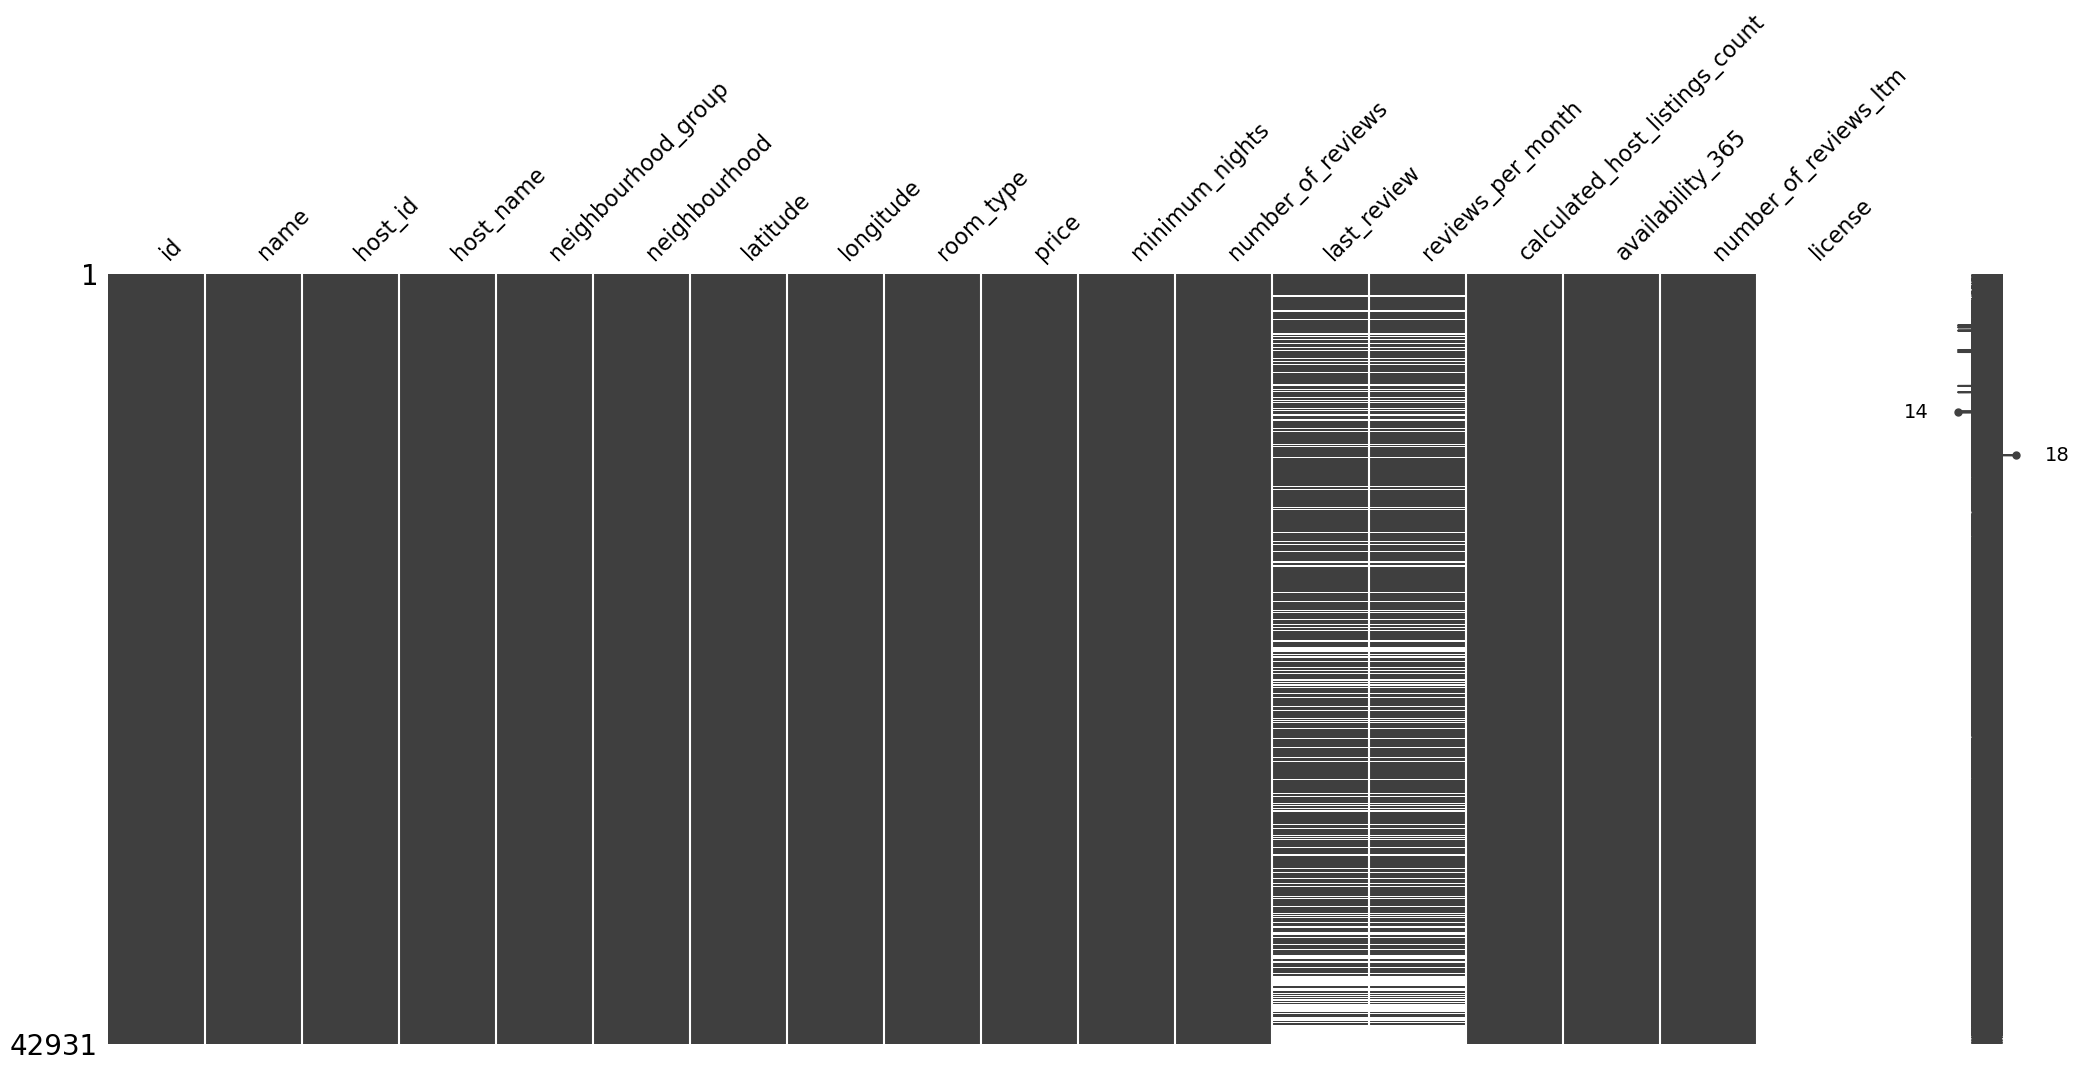

In [25]:
msno.matrix(data)


Data Cleaning
1. Handling NaN values
NaN also known as Not a Number represents missing values in the data that cannot be
converted into any datatype other than float.
When no information is provided for one or more features or for the entire unit, this is referred
to as missing data.
Missing data poses a serious issue in real-world situations.Many datasets have missing data
when they are imported into DataFrame, either because the data was never gathered or
because it was present but was not captured.
NaN values can impact various data operations, such as arithmetic computations, statistical
analysis, and machine learning algorithms, skew results and introduce bias in statistical
measures like means, medians, and correlations.
There are many methods for dealing with NaN values. One such way is to replace NaN values
with mode as it represents the most occuring value, making sure the integrity and reliability of
data.

In [26]:
data.isna().sum()

id                                    0
name                                 12
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10304
reviews_per_month                 10304
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           42930
dtype: int64

In [29]:
drop_col = ['host_id','id','license']
data = data.drop(columns = drop_col)
data.head()


,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,6/21/2022,0.30,3,314,3
1,BlissArtsSpace!,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,12/2/2019,0.30,2,365,1
2,Cozy Clean Guest Room - Family Apt,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,7/21/2017,0.72,1,0,0
3,Large Furnished Room Near B'way,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,2/19/2023,3.41,1,106,52
4,"Large Sunny Brooklyn Duplex, Patio + Garden",Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,8/10/2022,0.03,1,181,1


In [30]:
data.reviews_per_month.mode()


0    0.02
Name: reviews_per_month, dtype: float64

In [31]:
data.reviews_per_month = data.reviews_per_month.fillna(0.02)


In [32]:
data.isna().sum()
# Keeping last_review for further analysis

name                                 12
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10304
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
dtype: int64

In [34]:
data.duplicated().any()


True

In [35]:
data[data.duplicated()].shape


(10, 15)

In [36]:
data = data.drop_duplicates()


In [38]:
data.shape


(42921, 15)

In [39]:
data.dtypes


name                               object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

In [40]:
data['last_review'].unique()


array(['6/21/2022', '12/2/2019', '7/21/2017', ..., '2/23/2022',
       '3/10/2022', '3/18/2022'], dtype=object)

In [41]:
# Converting object to datetime64[ns]
data['last_review'] = pd.to_datetime(data['last_review'])

In [42]:
# Creating the 'year' column for analysis
data['year'] = data['last_review'].dt.year
data['year'].unique()


array([2022., 2019., 2017., 2023., 2021.,   nan, 2020., 2011., 2013.,
       2014., 2018., 2016., 2015., 2012.])

In [44]:
data.dtypes

name                                      object
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
year                                     float64
dtype: object

In [46]:
data.drop(columns = 'last_review',axis=1)

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,year
0,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,150,30,49,0.30,3,314,3,2022.0
1,BlissArtsSpace!,Garon,Brooklyn,Bedford-Stuyvesant,40.685350,-73.955120,Private room,60,30,50,0.30,2,365,1,2019.0
2,Cozy Clean Guest Room - Family Apt,MaryEllen,Manhattan,Upper West Side,40.803800,-73.967510,Private room,75,2,118,0.72,1,0,0,2017.0
3,Large Furnished Room Near B'way,Shunichi,Manhattan,Midtown,40.764570,-73.983170,Private room,68,2,575,3.41,1,106,52,2023.0
4,"Large Sunny Brooklyn Duplex, Patio + Garden",Rebecca,Brooklyn,Sunset Park,40.662650,-73.994540,Entire home/apt,275,60,3,0.03,1,181,1,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42926,bright studio in Williamsburg,Jean,Brooklyn,Williamsburg,40.718976,-73.963985,Entire home/apt,76,7,0,0.02,1,8,0,NaN
42927,Room in the heart of LES with Gym& Rooftop BBQ,Charlene,Manhattan,East Village,40.721703,-73.981473,Private room,32,30,0,0.02,5,79,0,NaN
42928,Fantastic 3BD apt in Brooklyn,Jose,Brooklyn,Bushwick,40.688700,-73.907650,Entire home/apt,127,3,0,0.02,8,356,0,NaN
42929,The Coziest Home,Remmy,Staten Island,Bull's Head,40.616911,-74.164652,Entire home/apt,280,1,0,0.02,1,87,0,NaN


In [47]:
data.describe()


,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,year
count,42921.000000,42921.000000,42921.000000,42921.000000,42921.000000,32626,42921.000000,42921.000000,42921.000000,42921.000000,32626.000000
mean,40.728267,-73.943658,200.189651,18.115165,25.862002,2021-08-16 22:13:45.795377920,0.893419,24.057082,140.255865,7.738403,2021.225955
min,40.500314,-74.251907,0.000000,1.000000,0.000000,2011-05-12 00:00:00,0.010000,1.000000,0.000000,0.000000,2011.000000
25%,40.687480,-73.981750,75.000000,2.000000,1.000000,2020-03-10 00:00:00,0.020000,1.000000,0.000000,0.000000,2020.000000
50%,40.724020,-73.952600,125.000000,7.000000,5.000000,2022-11-23 00:00:00,0.240000,1.000000,89.000000,1.000000,2022.000000
75%,40.762298,-73.924020,200.000000,30.000000,24.000000,2023-02-01 00:00:00,1.170000,4.000000,289.000000,7.000000,2023.000000
max,40.911380,-73.710870,99000.000000,1250.000000,1842.000000,2023-03-06 00:00:00,86.610000,526.000000,365.000000,1093.000000,2023.000000
std,0.057646,0.056631,895.147544,27.464470,56.621574,NaN,1.635675,80.877199,141.994403,18.292012,2.289809


The describe() function is used to provide a set of descriptive statistics, which include measures
such as the count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th
percentile), 75th percentile (Q3), and maximum.

In [48]:
room_list = data.groupby("room_type")["calculated_host_listings_count"].sum()
data_room_list = pd.DataFrame(room_list).reset_index()
column_name = ["room", "listings"]
data_room_list.columns = column_name
data_room_list

,room,listings
0,Entire home/apt,555985
1,Hotel room,2809
2,Private room,471145
3,Shared room,2615


Data Visualization
Data Visualization refers to graphical representation of data with the help of bar charts, pie
charts, line graphs, heatmaps, geographical maps et
cups


Host Listings Count by Room Types and Neighbourhood
Groups


In [50]:
# Grouping by neighbourhood_group and calculating listings count
list_neighb = data.groupby("neighbourhood_group")["calculated_host_listings_count"].sum()
df_neighb_list = pd.DataFrame(list_neighb).reset_index()

# Renaming the columns
column_names_2 = ["group", "listings"]
df_neighb_list.columns = column_names_2

# Display the DataFrame
df_neighb_list


,group,listings
0,Bronx,5103
1,Brooklyn,229209
2,Manhattan,645602
3,Queens,151472
4,Staten Island,1168


KeyError: 'group'

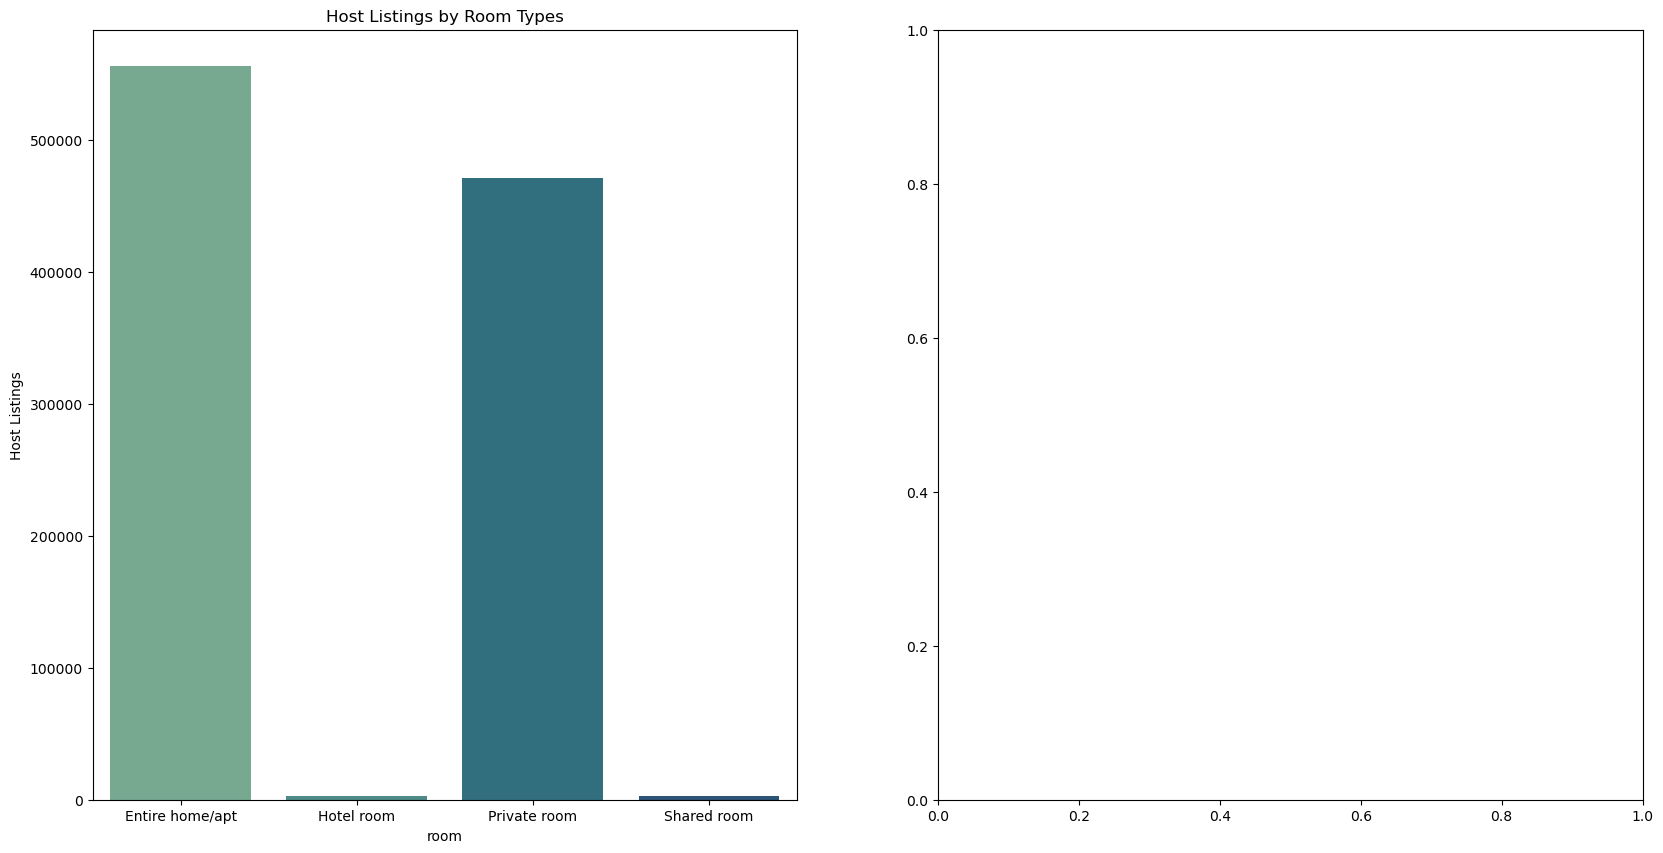

In [55]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Barplot for room types
sns.barplot(data=data_room_list,  # Ensure data_room_list is defined correctly
            x=data_room_list['room'],
            y=data_room_list['listings'],
            ax=ax1,
            palette="crest")
ax1.set_title("Host Listings by Room Types")
ax1.set_ylabel("Host Listings")

# Barplot for neighbourhood groups
sns.barplot(data=data_neighb_list,
            x=data_neighb_list['group'],
            y=data_neighb_list['listings'],
            ax=ax2,
            palette="magma")
ax2.set_title("Host Listing Count by Neighbourhood Group")
ax2.set_xlabel("Neighbourhood Group")
ax2.set_ylabel("Host Listings Count")

# Show the plots
plt.tight_layout()
plt.show()


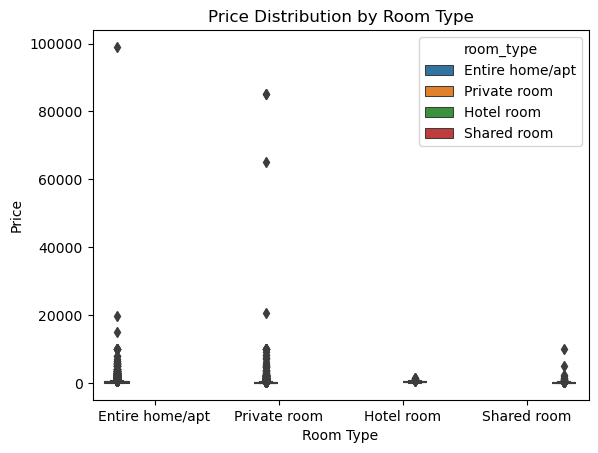

In [57]:
sns.boxplot(data=data, x='room_type', y='price', hue='room_type')

# Set the title and labels
plt.title("Price Distribution by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price")

# Show the plot
plt.show()

Price Distribution by Room Type


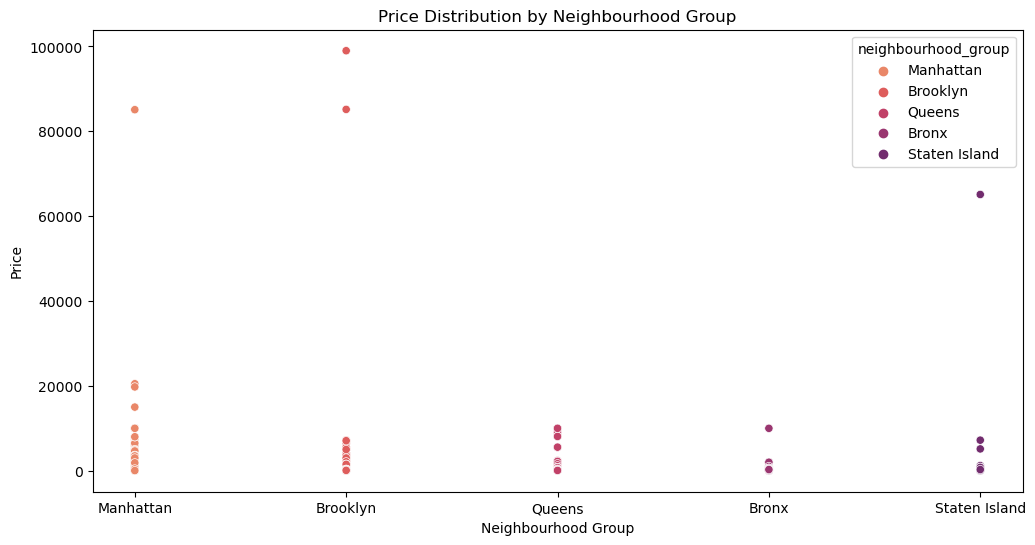

In [58]:
plt.figure(figsize=(12, 6))

# Create a scatter plot
sns.scatterplot(data=data,
                x='neighbourhood_group',
                y='price',
                hue='neighbourhood_group',
                palette='flare')

# Set the title and labels
plt.title("Price Distribution by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price")

# Show the plot
plt.show()

Price Distribution by Neighbourhood Groups

In [59]:
corr_table = data[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                   'availability_365', 'number_of_reviews_ltm']].corr()

# Display the correlation table
corr_table

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm
price,1.000000,-0.020675,-0.016406,-0.009522,0.027153,-0.008536
minimum_nights,-0.020675,1.000000,-0.138867,-0.240618,-0.092412,-0.216610
number_of_reviews,-0.016406,-0.138867,1.000000,0.610516,0.046174,0.652949
reviews_per_month,-0.009522,-0.240618,0.610516,1.000000,0.138872,0.858728
availability_365,0.027153,-0.092412,0.046174,0.138872,1.000000,0.122669
number_of_reviews_ltm,-0.008536,-0.216610,0.652949,0.858728,0.122669,1.000000


<Axes: >

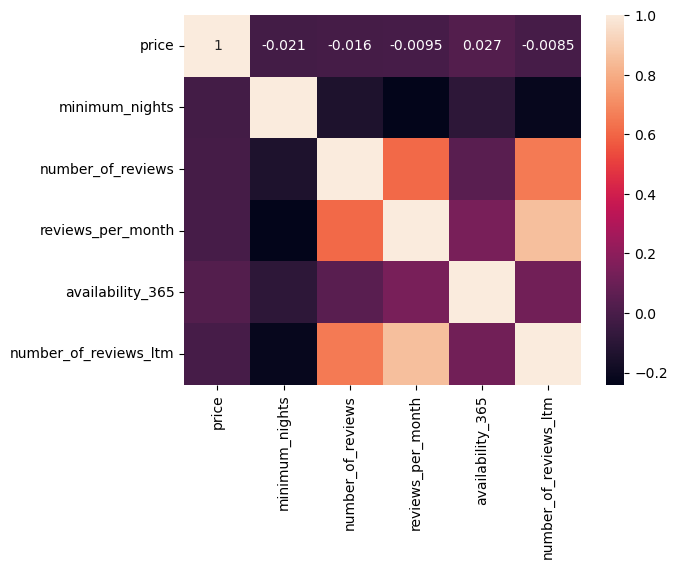

In [60]:
heat_map = sns.heatmap(data = corr_table, annot = True)
heat_map

In [61]:
location = data[['latitude','longitude','neighbourhood_group']]
location

,latitude,longitude,neighbourhood_group
0,40.753560,-73.985590,Manhattan
1,40.685350,-73.955120,Brooklyn
2,40.803800,-73.967510,Manhattan
3,40.764570,-73.983170,Manhattan
4,40.662650,-73.994540,Brooklyn
...,...,...,...
42926,40.718976,-73.963985,Brooklyn
42927,40.721703,-73.981473,Manhattan
42928,40.688700,-73.907650,Brooklyn
42929,40.616911,-74.164652,Staten Island


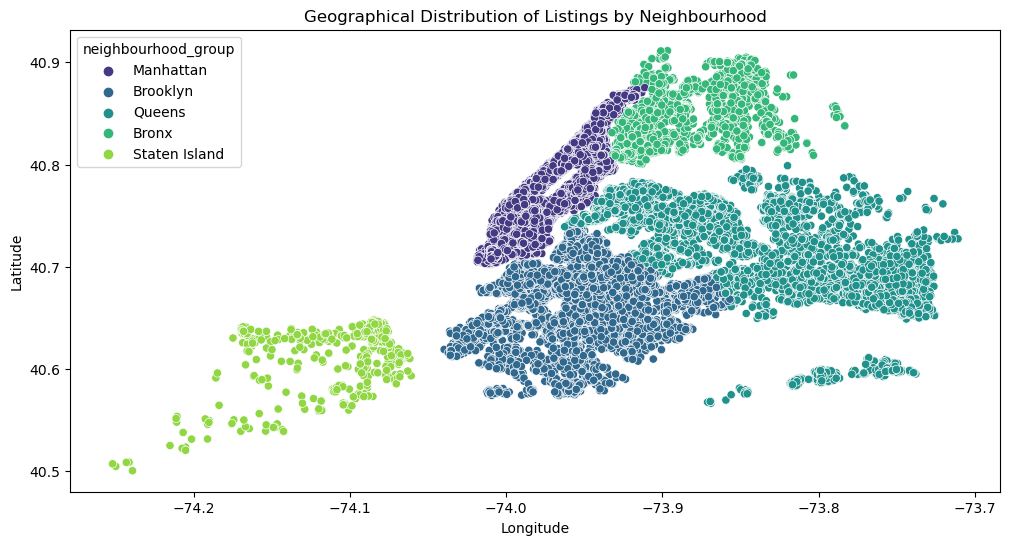

In [62]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a scatter plot for geographical distribution
geo_map = sns.scatterplot(data=data, x="longitude", y="latitude", hue="neighbourhood_group", palette='viridis')

# Set the title and labels
plt.title("Geographical Distribution of Listings by Neighbourhood")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()

Mean Price Distribution by Neighbourhood Groups and Room Types

In [63]:
av_price_room = data.groupby("room_type")["price"].mean()
df_av_room = pd.DataFrame(av_price_room).reset_index()
column_names = ["room_type", "price"]
df_av_room.columns = column_names
df_av_room

,room_type,price
0,Entire home/apt,249.255365
1,Hotel room,309.959391
2,Private room,134.696234
3,Shared room,126.250000


In [64]:
av_price_neighb = data.groupby("neighbourhood_group")["price"].mean()
df_av_neighb = pd.DataFrame(av_price_neighb).reset_index()
column_names = ["neighbourhood_group", "price"]
df_av_neighb.columns = column_names
df_av_neighb




,neighbourhood_group,price
0,Bronx,117.512123
1,Brooklyn,162.766829
2,Manhattan,268.118540
3,Queens,128.173655
4,Staten Island,309.037296


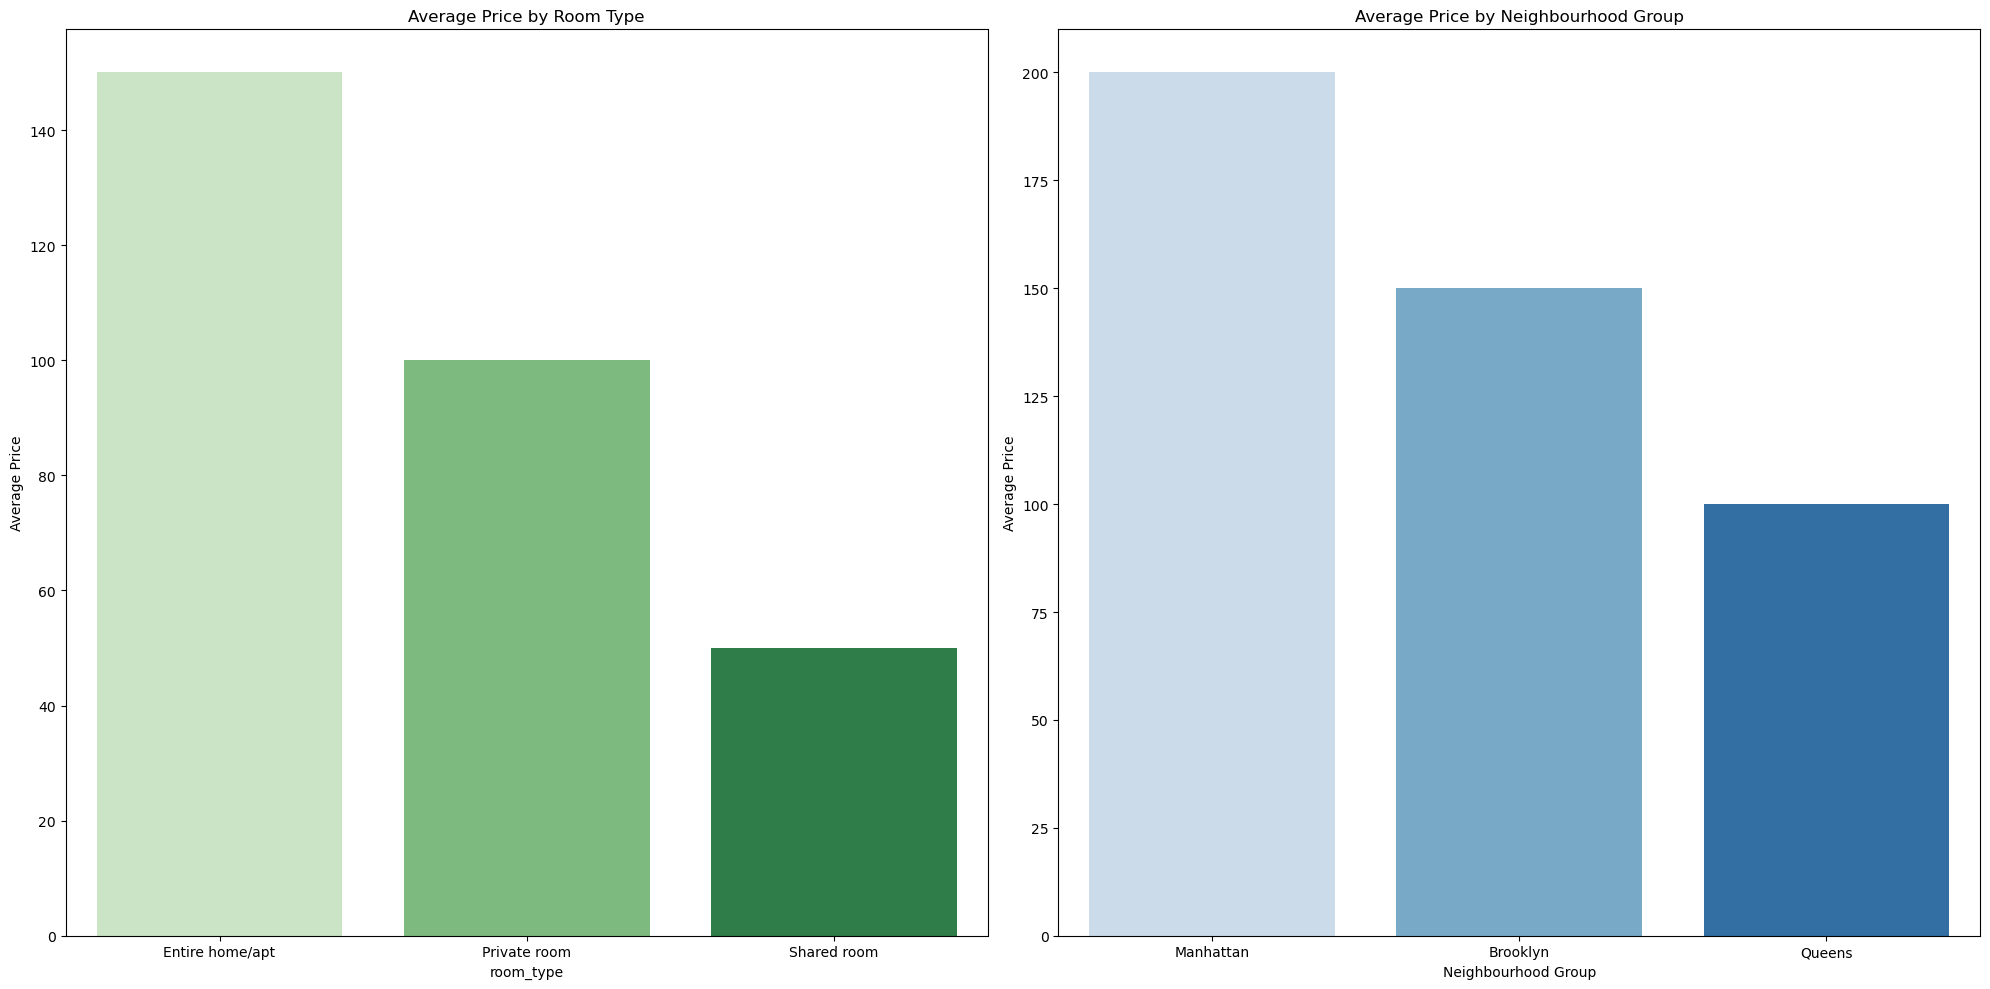

In [65]:
# Sample data for demonstration
# Replace this with your actual data
data_room = {
    'room_type': ['Entire home/apt', 'Private room', 'Shared room'],
    'price': [150, 100, 50]
}
data_neighb = {
    'neighbourhood_group': ['Manhattan', 'Brooklyn', 'Queens'],
    'price': [200, 150, 100]
}

# Create DataFrames
df_av_room = pd.DataFrame(data_room)
df_av_neighb = pd.DataFrame(data_neighb)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Average Price by Room Type
sns.barplot(data=df_av_room, x='room_type', y='price', ax=ax1, palette="Greens")
ax1.set_title("Average Price by Room Type")
ax1.set_ylabel("Average Price")

# Average Price by Neighbourhood Group
sns.barplot(data=df_av_neighb, x='neighbourhood_group', y='price', ax=ax2, palette="Blues")
ax2.set_title("Average Price by Neighbourhood Group")
ax2.set_xlabel("Neighbourhood Group")
ax2.set_ylabel("Average Price")

plt.tight_layout()
plt.show()


In [66]:
rev_room_type = data.groupby("room_type")["number_of_reviews"].sum()
df_rev_room_type = pd.DataFrame(rev_room_type).reset_index()
column_names = ["room_type", "number_of_reviews"]
df_rev_room_type.columns = column_names
df_rev_room_type


,room_type,number_of_reviews
0,Entire home/apt,645605
1,Hotel room,10292
2,Private room,442186
3,Shared room,11940


In [67]:
rev_neighb = data.groupby("neighbourhood_group")["number_of_reviews"].sum()
df_rev_neighb = pd.DataFrame(rev_neighb).reset_index()
column_names = ["neighbourhood_group", "number_of_reviews"]
rev_neighb.columns = column_names
df_rev_neighb

,neighbourhood_group,number_of_reviews
0,Bronx,43047
1,Brooklyn,466643
2,Manhattan,376780
3,Queens,208344
4,Staten Island,15209


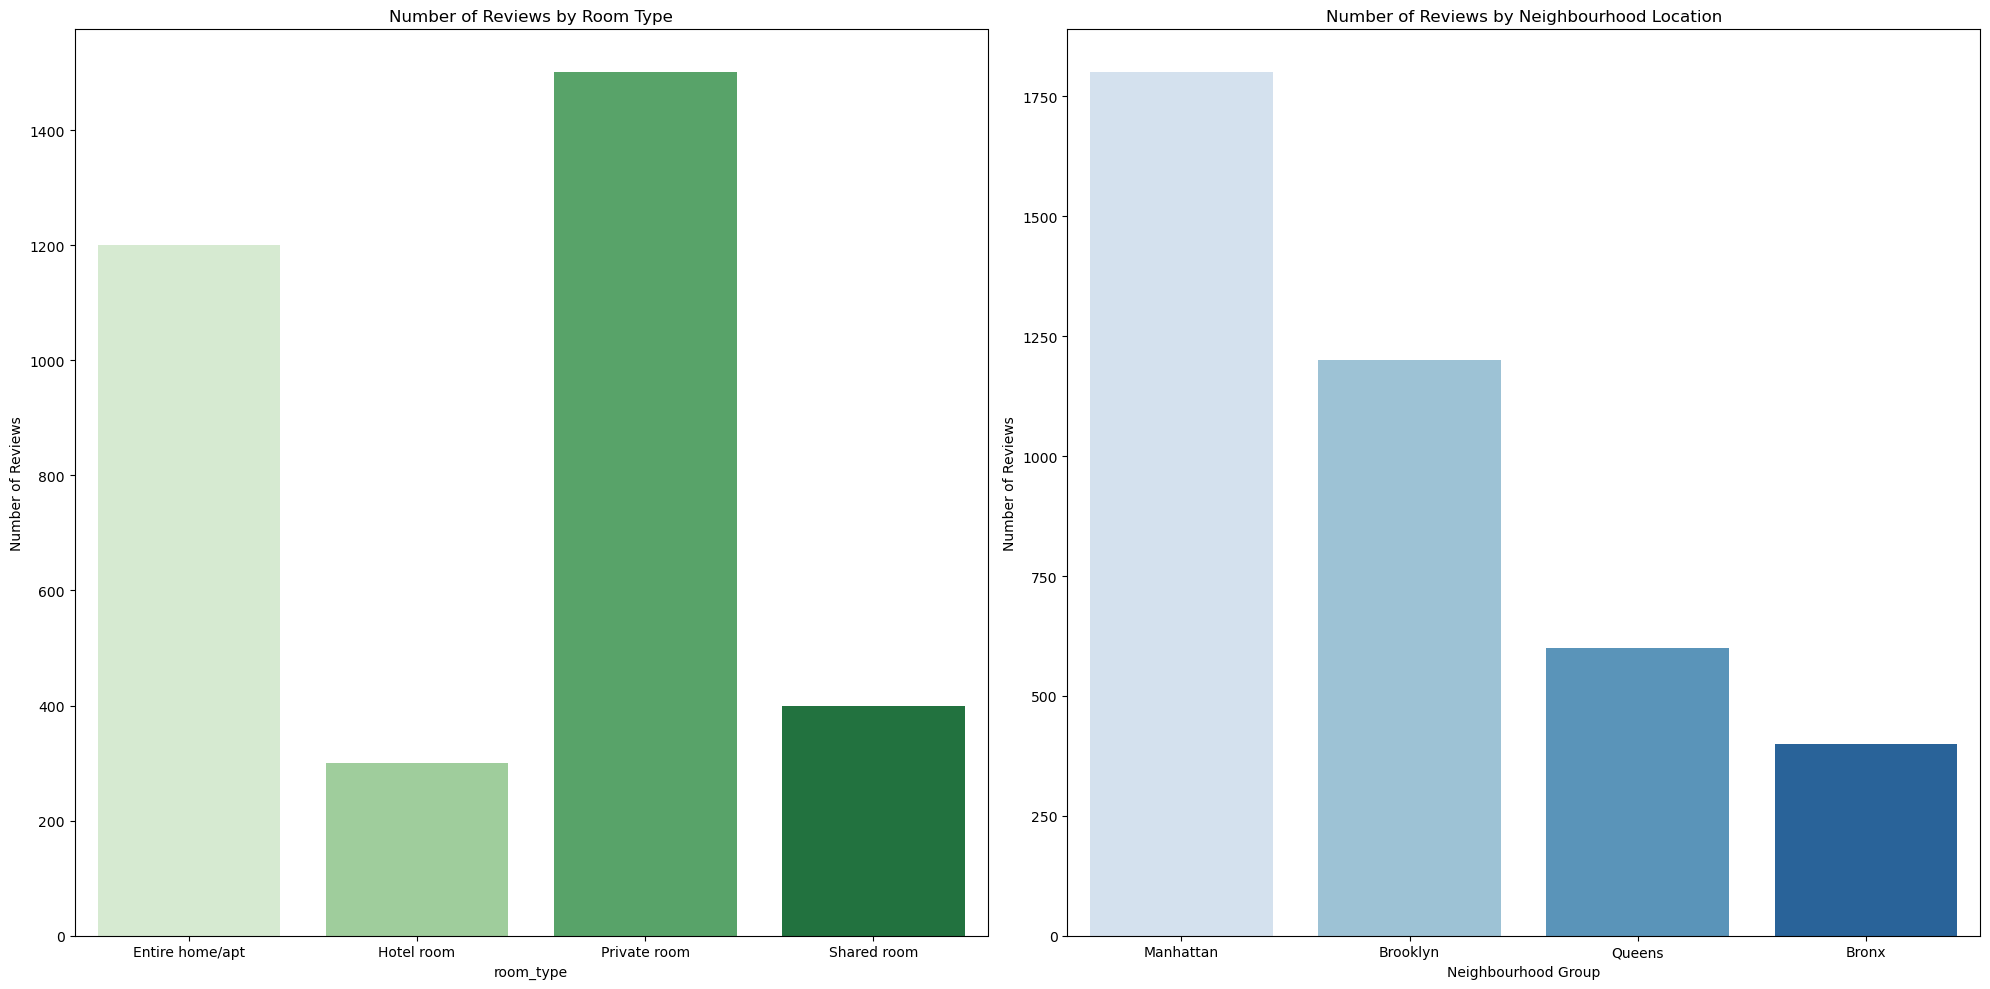

In [68]:
# Sample data for demonstration
# Replace this with your actual data
data_rev_room = {
    'room_type': ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
    'number_of_reviews': [1200, 300, 1500, 400]
}

data_rev_neighb = {
    'neighbourhood_group': ['Manhattan', 'Brooklyn', 'Queens', 'Bronx'],
    'number_of_reviews': [1800, 1200, 600, 400]
}

# Create DataFrames
df_rev_room_type = pd.DataFrame(data_rev_room)
df_rev_neighb = pd.DataFrame(data_rev_neighb)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Number of Reviews by Room Type
sns.barplot(data=df_rev_room_type, x='room_type', y='number_of_reviews', ax=ax1, palette="Greens")
ax1.set_title("Number of Reviews by Room Type")
ax1.set_ylabel("Number of Reviews")

# Number of Reviews by Neighbourhood Group
sns.barplot(data=df_rev_neighb, x='neighbourhood_group', y='number_of_reviews', ax=ax2, palette="Blues")
ax2.set_title("Number of Reviews by Neighbourhood Location")
ax2.set_xlabel("Neighbourhood Group")
ax2.set_ylabel("Number of Reviews")

plt.tight_layout()
plt.show()

In [69]:
room_365 = data.groupby("room_type")["availability_365"].sum()
df_room_365 = pd.DataFrame(room_365).reset_index()
column_names_3 = ["room_type", "availability"]
df_room_365.columns = column_names_3
df_room_365

,room_type,availability
0,Entire home/apt,3468510
1,Hotel room,40942
2,Private room,2417111
3,Shared room,93359


In [70]:
data

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,year
0,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,150,30,49,2022-06-21,0.30,3,314,3,2022.0
1,BlissArtsSpace!,Garon,Brooklyn,Bedford-Stuyvesant,40.685350,-73.955120,Private room,60,30,50,2019-12-02,0.30,2,365,1,2019.0
2,Cozy Clean Guest Room - Family Apt,MaryEllen,Manhattan,Upper West Side,40.803800,-73.967510,Private room,75,2,118,2017-07-21,0.72,1,0,0,2017.0
3,Large Furnished Room Near B'way,Shunichi,Manhattan,Midtown,40.764570,-73.983170,Private room,68,2,575,2023-02-19,3.41,1,106,52,2023.0
4,"Large Sunny Brooklyn Duplex, Patio + Garden",Rebecca,Brooklyn,Sunset Park,40.662650,-73.994540,Entire home/apt,275,60,3,2022-08-10,0.03,1,181,1,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42926,bright studio in Williamsburg,Jean,Brooklyn,Williamsburg,40.718976,-73.963985,Entire home/apt,76,7,0,NaT,0.02,1,8,0,NaN
42927,Room in the heart of LES with Gym& Rooftop BBQ,Charlene,Manhattan,East Village,40.721703,-73.981473,Private room,32,30,0,NaT,0.02,5,79,0,NaN
42928,Fantastic 3BD apt in Brooklyn,Jose,Brooklyn,Bushwick,40.688700,-73.907650,Entire home/apt,127,3,0,NaT,0.02,8,356,0,NaN
42929,The Coziest Home,Remmy,Staten Island,Bull's Head,40.616911,-74.164652,Entire home/apt,280,1,0,NaT,0.02,1,87,0,NaN


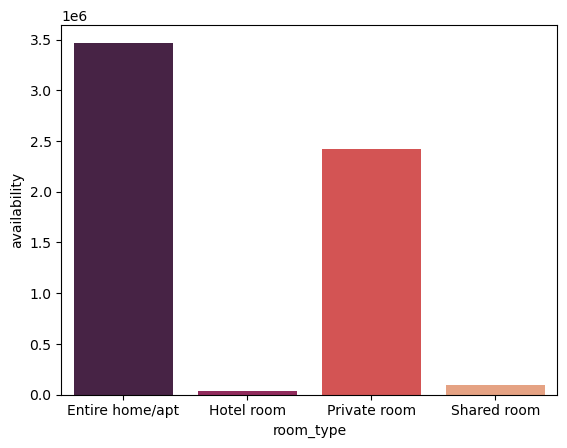

In [72]:
bar_room_365 = sns.barplot(data = df_room_365,
 x = df_room_365['room_type'],
 y = df_room_365['availability'],
 palette = "rocket")

In [75]:
price_year = data.groupby("year")["price"].sum()
df_price_year = pd.DataFrame(price_year).reset_index()
column_names = ["year", "price"]
df_price_year.columns = column_names
df_price_year

,year,price
0,2011.0,844
1,2012.0,1696
2,2013.0,6430
3,2014.0,16068
4,2015.0,127204
5,2016.0,191224
6,2017.0,155581
7,2018.0,204155
8,2019.0,338396
9,2020.0,380013


C:\Users\kakol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kakol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


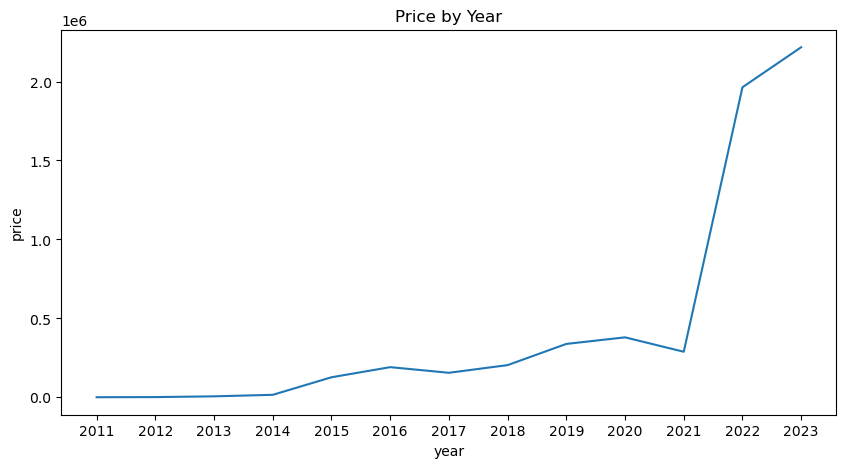

In [76]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=df_price_year, x="year", y="price")
ax.set_xticks(list(range(2011, 2024)))
plt.rcParams["figure.figsize"] = (10, 4)
plt.title("Price by Year")
plt.show()

In [78]:
host_year = data.groupby("year")["calculated_host_listings_count"].sum()
df_host_year = pd.DataFrame(host_year).reset_index()
column_names = ["year", "host listings"]
df_host_year.columns = column_names
df_host_year

,year,host listings
0,2011.0,32
1,2012.0,16
2,2013.0,33
3,2014.0,112
4,2015.0,898
5,2016.0,1764
6,2017.0,2238
7,2018.0,2855
8,2019.0,12653
9,2020.0,19224


C:\Users\kakol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kakol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


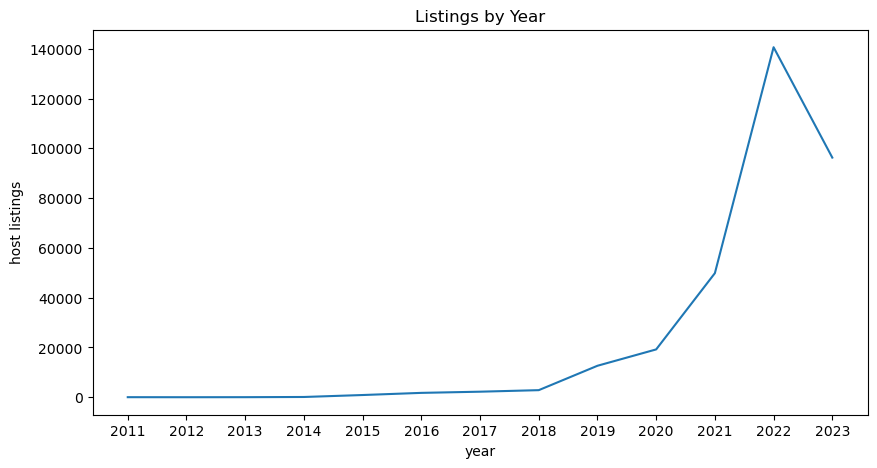

In [79]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=df_host_year, x="year", y="host listings")
ax.set_xticks(list(range(2011, 2024)))
plt.title("Listings by Year")
plt.show()

In [97]:
# Group by 'host_name' and sum the 'calculated_host_listings_count', then sort values
host_list = data.groupby("host_name")["calculated_host_listings_count"].sum().sort_values()

# Create a DataFrame from the sorted Series and reset the index
df_host_list = pd.DataFrame(host_list).reset_index()

# Rename the columns
column_names_4 = ["name", "hostings"]
df_host_list.columns = column_names_4

# Display the resulting DataFrame
df_host_list

,name,hostings
0,Kristyn,1
1,Maryse,1
2,Marycatherine,1
3,MaryAnne,1
4,Mary Sue,1
...,...,...
9826,Hiroki,42849
9827,June,49300
9828,RoomPicks,127313
9829,Eugene,155242


C:\Users\kakol\AppData\Local\Temp\ipykernel_884\111057395.py:16: UserWarning:

Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.

C:\Users\kakol\AppData\Local\Temp\ipykernel_884\111057395.py:16: UserWarning:

Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.

C:\Users\kakol\AppData\Local\Temp\ipykernel_884\111057395.py:16: UserWarning:

Glyph 39062 (\N{CJK UNIFIED IDEOGRAPH-9896}) missing from current font.

C:\Users\kakol\AppData\Local\Temp\ipykernel_884\111057395.py:16: UserWarning:

Glyph 38886 (\N{CJK UNIFIED IDEOGRAPH-97E6}) missing from current font.

C:\Users\kakol\AppData\Local\Temp\ipykernel_884\111057395.py:16: UserWarning:

Glyph 36798 (\N{CJK UNIFIED IDEOGRAPH-8FBE}) missing from current font.

C:\Users\kakol\AppData\Local\Temp\ipykernel_884\111057395.py:16: UserWarning:

Glyph 33655 (\N{CJK UNIFIED IDEOGRAPH-8377}) missing from current font.

C:\Users\kakol\AppData\Local\Temp\ipykernel_884\111057395.py:16: UserWarning:

Glyph 35199 (\N{CJK UNIF

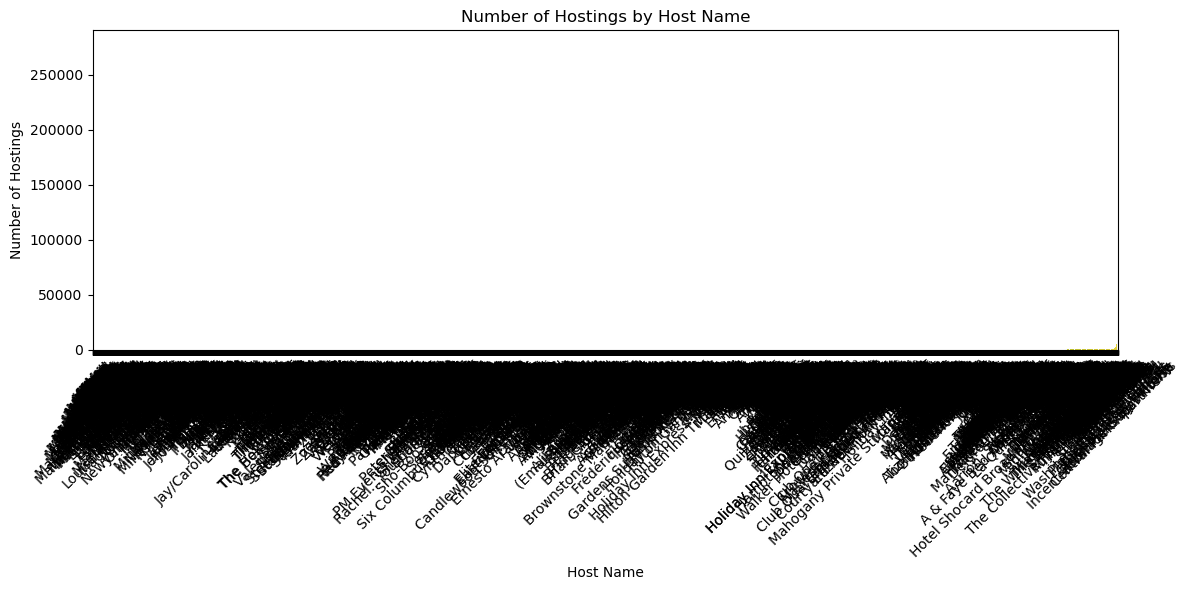

In [107]:



# Set the figure size for better visibility
plt.figure(figsize=(12, 6))

# Create the bar plot
bar_host_list = sns.barplot(data=df_host_list, x='name', y='hostings', palette='viridis')

# Set the title and labels
plt.title('Number of Hostings by Host Name')
plt.xlabel('Host Name')
plt.ylabel('Number of Hostings')

# Rotate x-axis labels if necessary for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


In [106]:
# Join the 'host_name' column into a single string
name = ' '.join(data['host_name'].astype(str))





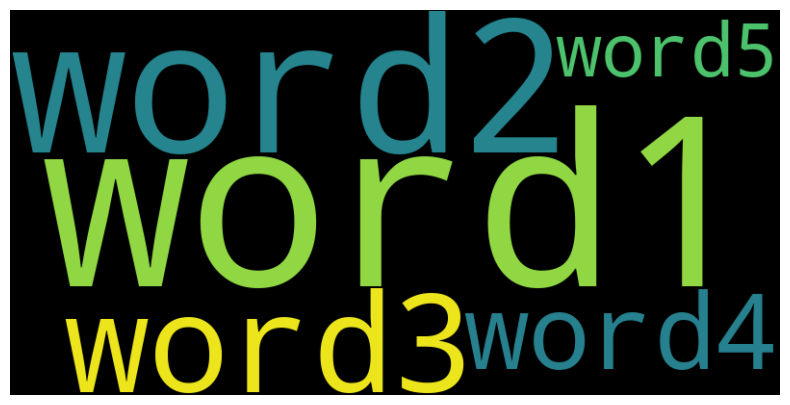

In [100]:
text = "word1 word2 word3 word1 word4 word2 word5"

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

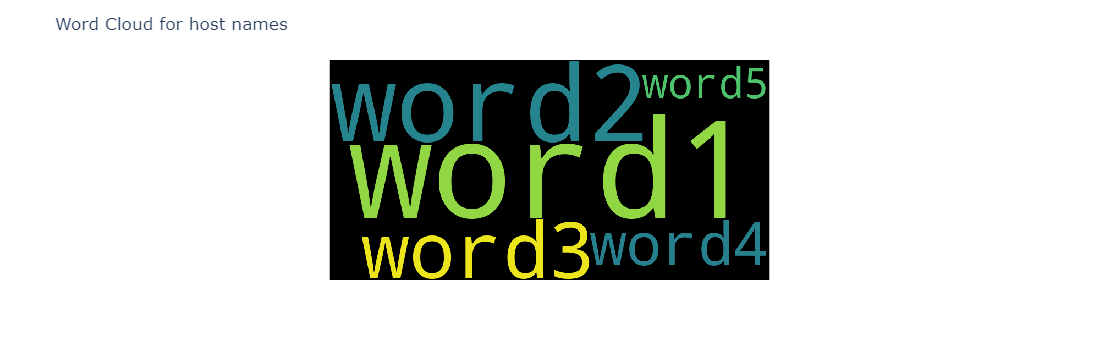

In [101]:
# imshow() is used to display the wordcloud
fig = px.imshow(wordcloud.to_array())
fig.update_layout(title_text='Word Cloud for host names')
# showticklabels specify whether tick labels should be shown or not
fig.update_xaxes(showticklabels = False)
fig.update_yaxes(showticklabels = False)
fig.show()